<h1> Увеличение выручки интернет-магазина </h1>

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

**Входные данные**

Гипотезы (файл hypothesis.csv):

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы

Заказы (файл orders.csv):

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Посетители (файл visitors.csv):

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

**Цель исследования:** Приоритизация гипотез, выполнение A/B тестов и анализ результатов


**Ход исследования.**

Исследование пройдет в три этапа:
* Загрузка и подготовка данных
* Приоритизация гипотез
* Анализ A/B-теста с выводами

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta

pd.set_option('display.max_colwidth', False)

Загрузим данные, предварительно указав столбцы с датами в запросе для того, чтобы они сразу имели нужный тип.

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv', parse_dates=[2])
    visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=[0])

except: 
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [3]:
def intro(df):
    display(df.head(5))
    print()
    df.info()
    display(df.describe())

**Таблица `hypothesis`**

In [4]:
intro(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Приведём названия столбцов к нижнему регистру.

In [5]:
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Таблица `orders`**

In [6]:
intro(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Приведём названия столбцов к нижнему регистру и к змеиному регистру.

In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Посмотрим сколько групп присутстует в нашем тесте.

In [8]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Как мы видим, у нас есть две группы и количество записей для группы B немного больше, чем группы A.

Посмотрим не попадают ли какие-то пользователи в обе группы.

In [9]:
len(set(orders.query('group == "A"')['visitor_id']) & set(orders.query('group == "B"')['visitor_id']))

58

Как мы видим, 58 пользователей присутствуют в обеих группах. Удалять их не будем, но необходимо было бы сообщить об этом коллегам.

Проверим есть ли в данных пропущенные значения.

In [10]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Пропущенных значений не обнаружено. Проверим данные на наличие дубликатов.

In [11]:
orders.duplicated().sum()

0

Дубликатов не обнаружено.

**Таблица `visitors`**

In [12]:
intro(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Проверим дату начала и окончания теста.

In [13]:
# дата начала теста
min_analysis_date = visitors['date'].min()

# дата окончания теста
observation_date = visitors['date'].max()

print('Дата начала теста:', min_analysis_date,
      '\nДата окончания теста', observation_date)

Дата начала теста: 2019-08-01 00:00:00 
Дата окончания теста 2019-08-31 00:00:00


Тест проводился с 1 по 31 августа 2019 года.

Проверим есть ли в данных пропущенные значения.

In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропущенных значений не обнаружено. Проверим данные на наличие дубликатов.

In [15]:
visitors.duplicated().sum()

0

Дубликатов не обнаружено.

### Вывод

В нашем распоряжении имеются три таблицы с данными. Согласно документации:

Таблица `hypothesis`:  

* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Таблица `orders`:

* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Таблица `visitors`:

* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

Было выявлено следующее:
* Тест проводился с 1 по 31 августа 2019 года
* В тесте присутствуют две группы: `A` и `B`
* 58 пользователей каким-то образом попали в обе группы. Необходимо сообщить об этом коллегам.

В ходе подготовки данных были проведены следующие действия:

* Приведены к нижнему регистру и к змеиному регистру названия столбцов в таблицах
* Данные проверены на наличие пропущенных значений и дубликатов

## Приоритизация гипотез

### ICE

In [16]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis.sort_values(by = 'ICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### RICE

In [17]:
hypothesis['RICE'] = round(hypothesis['reach']*hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
hypothesis.sort_values(by = 'RICE', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Вывод

Наиболее перспективные гипотезы по `ICE`:

- Запустить акцию, дающую скидку на товар в день рождения (**гипотеза 8**)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (**гипотеза 0**)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (**гипотеза 7**)

Что касаетсям `RICE`, тройка перспективных гипотез выглядит следующим образом:

- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (**гипотеза 7**)
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (**гипотеза 2**)
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (**гипотеза 0**)

Фрейморк RICE при расчете учитывает еще один показатель - "reach", который учитывает скольких пользователей затронет изменение.  Именно он влияет на перестановку гипотез по степени приоритетности.  

Например, занимавшая первое место по ICE гипотеза о запуске акции, дающую скидку в день рождения, в случае приоритизации по RICE оказывается аж на пятое место. Это можно объяснить тем, что охват у нее самый низкий (reach) - всего 1 балл. Данная акция для пользователя возможна только 1 раз в год, что существенно ограничивает ее применение. 

Гипотезы фреймворка RICE являются наиболее приоритетными, поэтому именно их следует использовать при проведении A/B-теста.

## Анализ A/B-теста

###  Построение графика кумулятивной выручки по группам

Создадим массив уникальных пар значений дат и групп из таблицы orders и избавимся от дубликатов методом drop_duplicates():

In [18]:
dates_groups = orders[['date','group']].drop_duplicates()

Объявим переменную `orders_aggregated`, которая будет содержать:
   - дату;
   - группу A/B-теста;
   - число уникальных заказов в группе теста по указанную дату включительно;
   - число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
   - суммарную выручку заказов в группе теста по указанную дату включительно

In [19]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 
            'revenue' : 'sum'
        }
    ), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о пользователях. Объявим переменную visitors_aggregated, содержащую дату, группу A/B-теста и количество уникальных посетителей в группе теста по указанную дату включительно

In [20]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'visitors' : 'sum'
        }
    ), axis=1).sort_values(by=['date','group'])

Объединим созданные переменные в одну методом merge. Назовем ее cumulative_data, а столбцам присвоим следующие названия `date`, `group`, `orders`, `buyers`, `revenue`, `visitors`

In [21]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Объявим переменные cumulative_revenueA и cumulative_revenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B

In [22]:
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [23]:
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

Теперь можем построить графики кумулятивной выручки по дням и группам A/B-тестирования

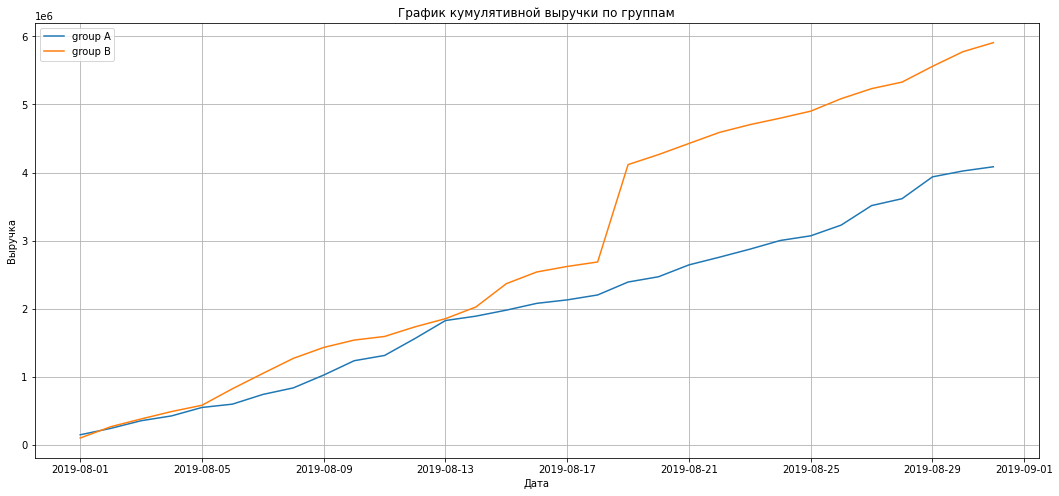

In [24]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')

plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='group A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='group B')
plt.legend() 
plt.show()

**ВЫВОД:** 

По графику можно заметить, что выручка сегмента А росла практически равномерно с самого начала теста.
Что же касается сегмента В, с небольшим перевесом он лидировал с самого начала теста, иногда даже находясь на одном уровне с сегментом А. Однако 18 августа можно заметить резкий скачок выручки у сегмента В, который вызван скорее всего либо аномально большим заказом, либо наличием очень дорогих товаров в заказе

### Построение графика кумулятивного среднего чека по группам

Построим график кумулятивного среднего чека по группам

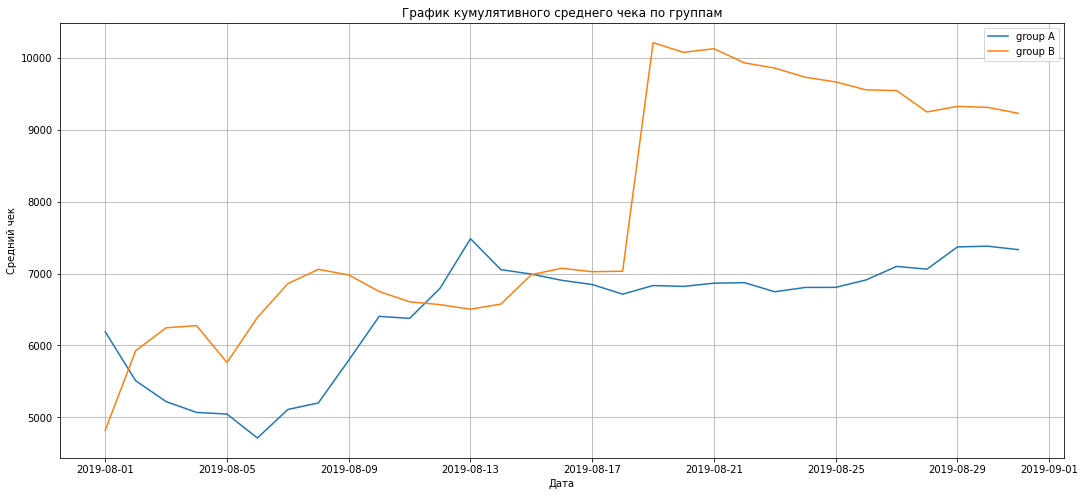

In [25]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='group A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='group B')
plt.legend() 
plt.show()

**ВЫВОД:** 

На данном графике опять заметен резкий скачок среднего чека в сегмента В 18 августа. Скорее всего были крупные заказы, которые сильно повлияли на данные.
В первой половине месяца значения среднего чека колеблются как у сегмента А, так и у сегмента В. Сегмент А достигает своего пика 13 августа, после чего немного снижается и стабилизируется, снова достигая пика к концу месяца

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Объединим cumulative_revenueA и cumulative_revenueB методом merge() так, чтобы она содержала столбцы: `date`, `revenueA`, `revenueB`, `ordersA`, `ordersB`. Сохраним всё в переменной merged_cumulative_revenue

In [26]:
merged_cumulative_revenue = cumulative_revenueA.merge(
                                                        cumulative_revenueB, 
                                                        left_on='date', 
                                                        right_on='date', 
                                                        how='left', 
                                                        suffixes=['A', 'B']
                                                    )

Построим график относительно различия кумулятивного среднего чека группы B к группе A

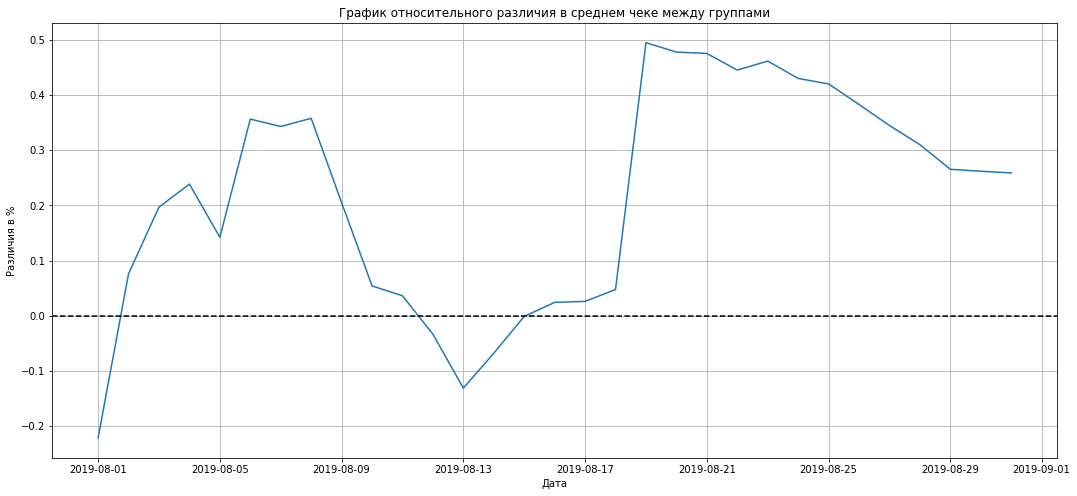

In [27]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График относительного различия в среднем чеке между группами')
plt.xlabel('Дата')
plt.ylabel('Различия в %')

plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

**ВЫВОД:**

Все три графика демонстрируют одну картину 18 августа: везде заметен резкий скачок сегмента В, когда и были совершены аномальные заказы.
Помимо 18 августа также стоит отметить и резкое падение результатов теста 8 августа

###  Построение графика кумулятивного среднего количества заказов на посетителя по группам

Добавим в cumulative_data столбец `conversion` c отношением числа заказов к количеству пользователей в указанной группе в указанный день

In [28]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

Объявим переменные `cumulative_dataA` и `cumulative_dataB`, в которых сохраним данные о заказах в группах A и B соответственно

In [29]:
cumulative_dataA = cumulative_data[cumulative_data['group']=='A']
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']

Построим график

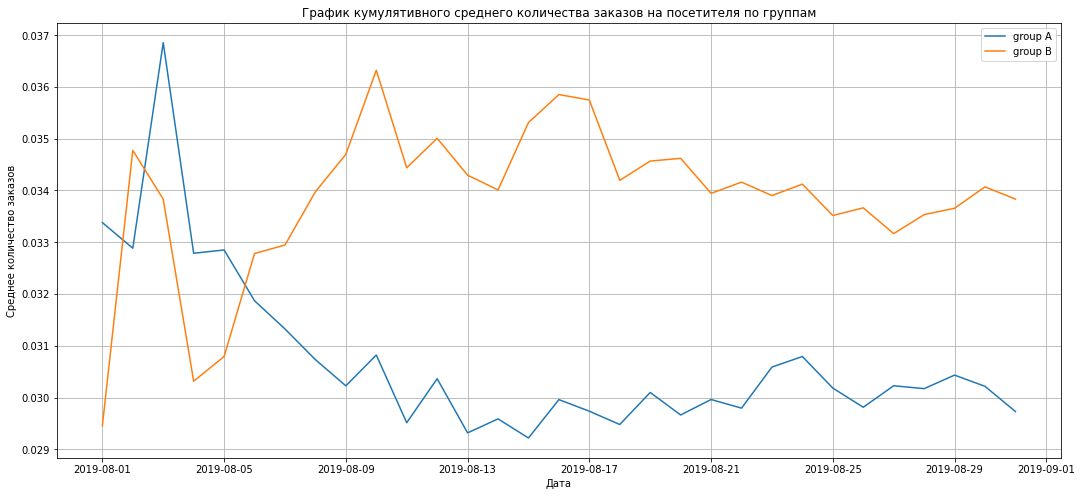

In [30]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')

plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='group A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='group B')
plt.legend()
plt.show()

**ВЫВОД:**

В самом начале теста конверсия сегмента А была выше сегмента В, после чего наблюдаются сильные колебания у обоих сегментов. Однако уже 9 августа графики пересекаются, после чего конверсия сегмента В начинает расти и так и остается выше сегмента А до конца теста. На данном этапе конверсия группы В выглядит лучше конверсии гуппы А (3,4% против 3,0%)

###  Построение рафика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

В переменной `merged_cumulative_conversions` объединим таблицы `cumulative_dataA` и `cumulative_dataB`

In [31]:
merged_cumulative_conversions = cumulative_dataA[['date','conversion']].merge(
                                                                                cumulative_dataB[['date','conversion']], 
                                                                                left_on='date', 
                                                                                right_on='date', 
                                                                                how='left', 
                                                                                suffixes=['A', 'B']
                                                                            )

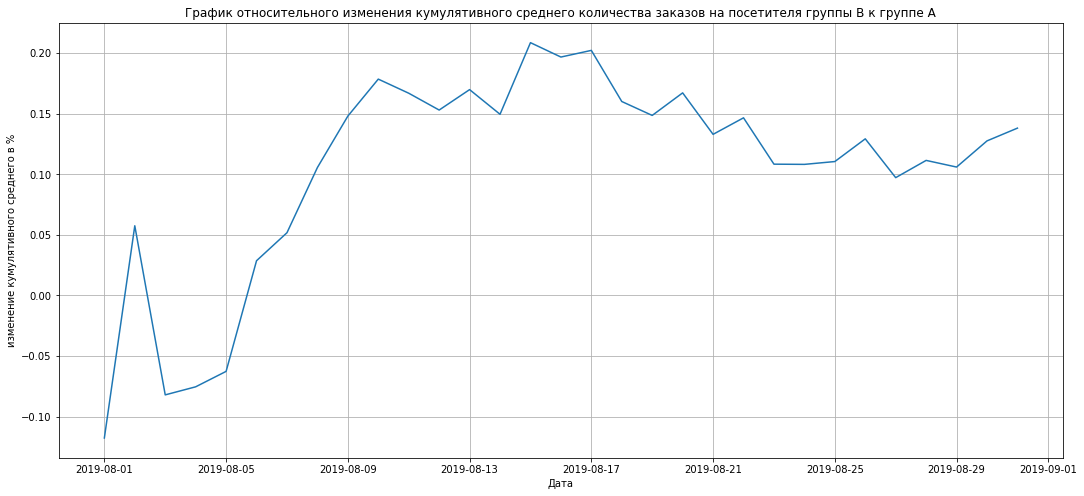

In [32]:
plt.figure(figsize=(18,8))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('изменение кумулятивного среднего в %')

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.show()

**ВЫВОД:**

В начале теста группа В в основном проигрывала группе А, но с 6 августа начинается подъем и группа В вырывается вперед, достигая пика в середине месяца. С 8 августа график колебался от 10 до 20%, постепенно снижаясь к концу месяца.

### Построение точечного графика количества заказов по пользователям

Найдем число заказов по пользователям

In [33]:
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_per_user.columns = ['visitor_id', 'orders']

In [34]:
orders_per_user.head(10)

,visitor_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
5,47206413,1
6,48147722,1
7,54447517,1
8,56960363,1
9,66685450,1


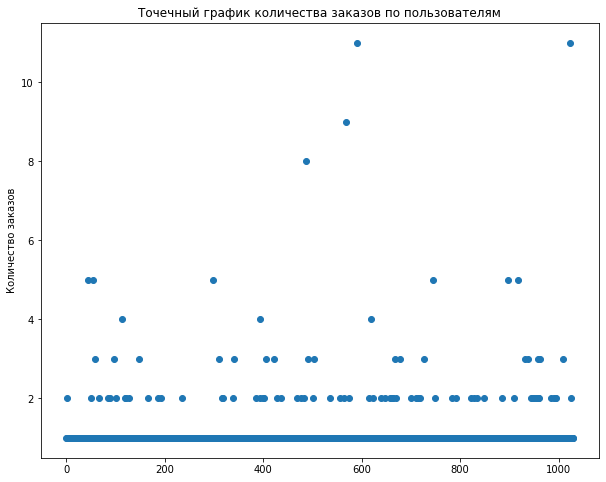

In [35]:
plt.figure(figsize=(10,8))
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

x_values = pd.Series(range(0, len(orders_per_user)))
plt.scatter(x_values, orders_per_user['orders']) 
plt.show()

**ВЫВОД:**

В основном покупают всего 1 раз, но пользователей, совершивших 2 покупки также достаточно. А вот заказавших более 2 раз мало, таких пользователей вполне можно считать аномальными. Но чтобы убедиться в этом наверняка необходимо посчитать перцентили.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя

In [36]:
print(np.percentile(orders_per_user['orders'], [95, 99]))

[2. 4.]


**ВЫВОД:** 

Как и ожидалось, не более 5% пользователей заказывали более 2 раз, и всего не более 1% делали заказы больше 4 раз.
Поэтому можно смело выбрать 2 заказа на одного пользователя как границу и отсеять аномальных пользователей, совершивших больше заказов.

### Построение точечного графика стоимостей заказов

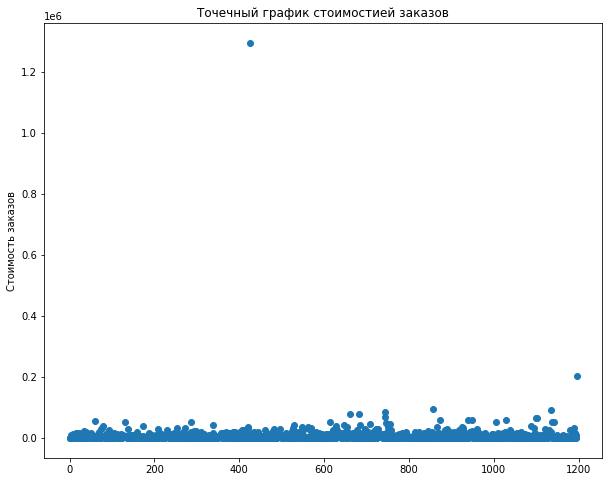

In [37]:
plt.figure(figsize=(10,8))
plt.title('Точечный график стоимостией заказов')
plt.ylabel('Стоимость заказов')

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.show()

**ВЫВОД:**

На графике видны два отчетливых выброса, заказов стоимостью больше 100 тыс. практически нет. 
Стоит изучить результаты подсчета перцентилей

### Расчет 95-й и 99-й перцентилей стоимости заказов

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**ВЫВОД:**

Не более 5% заказов стоят дороже 28 тысяч, и не более 1% - дороже 58 тысяч. 
В качестве границы для аномальных покупок выберем 95-ый перцентиль: покупки дороже 28 тысяч будем считать аномальными.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы. 
- **Нулевая**: различий в среднем количестве заказов на посетителя между группами нет
- **Альтернативная**: различия в среднем количестве заказов на посетителя между группами есть

Порог `alpha` зададим на уровне 5%. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [39]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_dateA']

visitors_A_cummulative = visitors_A_daily.apply(
    lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateA': 'sum'}
    ),
    axis=1,
)
visitors_A_cummulative.columns = ['date', 'visitors_cummulativeA']

In [40]:
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_dateB']

visitors_B_cummulative = visitors_B_daily.apply(
    lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateB': 'sum'}
    ),
    axis=1,
)
visitors_B_cummulative.columns = ['date', 'visitors_cummulativeB']

In [41]:
orders_A_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A_daily.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

orders_A_cummulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateA': 'sum', 'revenue_per_dateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_A_cummulative.columns = [
    'date',
    'orders_cummulativeA',
    'revenue_cummulativeA',
]

In [42]:
orders_B_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B_daily.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']

orders_B_cummulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateB': 'sum', 'revenue_per_dateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_B_cummulative.columns = [
    'date',
    'orders_cummulativeB',
    'revenue_cummulativeB',
]

In [43]:
data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  orders_per_dateA  revenue_per_dateA  orders_per_dateB  \
0 2019-08-01  24                148579             21                 
1 2019-08-02  20                93822              24                 
2 2019-08-03  24                112473             16                 
3 2019-08-04  16                70825              17                 
4 2019-08-05  25                124218             23                 

   revenue_per_dateB  orders_cummulativeA  revenue_cummulativeA  \
0  101217             24                   148579                 
1  165531             44                   242401                 
2  114248             68                   354874                 
3  108571             84                   425699                 
4  92428              109                  549917                 

   orders_cummulativeB  revenue_cummulativeB  visitors_per_dateA  \
0  21                   101217                719                  
1  45                   266748    

Получили следующие данные:   
`date` — дата   
`orders_per_dateA` — количество заказов в выбранную дату в группе A  
`revenue_per_dateA` — суммарная выручка в выбранную дату в группе A  
`orders_per_dateB` — количество заказов в выбранную дату в группе B  
`revenue_per_dateB` — суммарная выручка в выбранную дату в группе B  
`orders_cummulativeA` — суммарное число заказов до выбранной даты включительно в группе A  
`revenue_cummulativeA` — суммарная выручка до выбранной даты включительно в группе A  
`orders_cummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B  
`revenue_cummulativeB` — суммарная выручка до выбранной даты включительно в группе B  
`visitors_per_dateA` — количество пользователей в выбранную дату в группе A  
`visitors_per_dateB` — количество пользователей в выбранную дату в группе B  
`visitors_cummulativeA` — количество пользователей до выбранной даты включительно в группе A  
`visitors_cummulativeB` — количество пользователей до выбранной даты включительно в группе B  

Посчитаем статистическую значимость различия в среднем количестве заказов между группами. Создадим переменные `orders_per_userA` и `orders_per_userB`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [44]:
orders_per_userA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_per_userA.columns = ['user_id', 'orders']

orders_per_userB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_per_userB.columns = ['user_id', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули

In [45]:
sampleA = pd.concat([orders_per_userA['orders'],pd.Series(0, index=np.arange(data['visitors_per_dateA'].sum() - len(orders_per_userA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_per_userB['orders'],pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - len(orders_per_userB['orders'])), name='orders')],axis=0)

In [46]:
print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
if ((stats.mannwhitneyu(sampleA, sampleB)[1]) < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительный прирост средней конверсии группы B к группе A: {0:.3f}".format((data['orders_per_dateB'].sum()/data['visitors_per_dateB'].sum())/(data['orders_per_dateA'].sum()/data['visitors_per_dateA'].sum())-1))

P-value: 0.01679
Отвергаем нулевую гипотезу
Относительный прирост средней конверсии группы B к группе A: 0.138


**ВЫВОД:**

P-value меньше 0,05, поэтому можем отвергнуть нулевую гипотезу. Сырые данные говорят нам о том, что между группами есть различия в среднем количестве заказов на посетителя. Относительный прирост конверсии группы В к конверсии группы А равен 13,8%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. 
- **Нулевая**: различий в среднем чеке заказа между группами нет
- **Альтернативная**: различия в среднем чеке заказа между группами есть

Порог `alpha` зададим на уровне 5%. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [47]:
print("P-value: {0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if ((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]) < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительное различие среднего чека: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.72929
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека: 0.259


**ВЫВОД:**

P-value больше 0,05 – статистически значимых отличий нет, отвергнуть нулевую гипотезу не получилось. Но при этом относительное различие среднего чека между сегментами 26%.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем гипотезы. 
- **Нулевая**: различий в среднем количестве заказов на посетителя между группами нет
- **Альтернативная**: различия в среднем между группами есть

Порог `alpha` зададим на уровне 5%. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

Как мы говорили ранее, примем за аномальных пользователей тех, кто совершил более 2 заказов или сделал заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Сделаем срез пользователей с числом заказов больше 2 в переменную `users_with_many_orders`

In [48]:
users_with_many_orders = pd.concat(
    [
        orders_per_userA[orders_per_userA['orders'] > np.percentile(orders_per_user['orders'], 95)]['user_id'],
        orders_per_userB[orders_per_userB['orders'] > np.percentile(orders_per_user['orders'], 95)]['user_id'],
    ],
    axis=0,
)

Пользователей, совершивших заказы дороже 28 000 сохранием в переменную `users_with_expensive_orders`

In [49]:
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']

Объединим их в таблице `abnormal_users`.

In [50]:
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()

In [51]:
print(abnormal_users.head(10))
print(abnormal_users.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
684     358944393
648     382846391
1189    393266494
68      457167155
68      611059232
dtype: int64
74


Всего получилось 74 аномальных пользователя

Создадим переменные sample_A_filtered и sample_B_filtered, в которых сохраним очищенные данные — без учета аномальных пользователей

In [52]:
sample_A_filtered = pd.concat([
        orders_per_userA[
            np.logical_not(orders_per_userA['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_dateA'].sum() - len(orders_per_userA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [53]:
sample_B_filtered = pd.concat(
    [
        orders_per_userB[
            np.logical_not(orders_per_userB['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_dateB'].sum() - len(orders_per_userB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [54]:
print("P-value: {0:.5f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
if ((stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]) < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("Относительный прирост средней конверсии группы B к группе A: {0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1)) 

P-value: 0.01304
Отвергаем нулевую гипотезу
Относительный прирост средней конверсии группы B к группе A: 0.173


**ВЫВОД:**

Как и в случае с сырыми данными, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем. Сегмент B оказался значительно лучше сегмента A.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

Сформулируем гипотезы. 
- **Нулевая**: различий в среднем чеке заказа между группами нет
- **Альтернативная**: различия в среднем чеке заказа между группами есть

Порог `alpha` зададим на уровне 5%. Для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

In [55]:
print(
    'P-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
     "Относительное различие среднего чека между группами: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.738
Относительное различие среднего чека между группами: -0.020


**ВЫВОД:**

Как и с сырыми данными, p-value оказалася больше 0,05, а значит нулевую гипотезу мы не можем отвергнуть. 
А вот средний чек группы B, после очистки данных, стал ниже среднего чека группы A на 2%.

### Решение и вывод по результатам теста

Исходя из полученных результатов можно сделать следующие выводы:

- Как по "сырым", так и по очищенным данным между группами имеются статистически значимые различия в среднем количестве заказов на посетителя. 

- Показатель конверсии в группе В больше показателя группы А: 14% до очистки и 17% после

- Статистически значимых различий в среднем чеке между группами нет как в "сырых данных", так и в очищенных

- Однако разница в среднем чеке между сегментами сократилась с 26% до 2% после удаления аномальных значений - различие среднего чека между группами практически пропало

- Именно сильные колебания графика различия среднего чека позволили обнаружить аномалии

- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеют тенденцию к росту

Исходя из всех полученных данных, тест можно остановить и признать его успешным: при имеющихся данных группа В оказалась лучше группы А